In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gholax.util.model import Model
from gholax.sampler.fisher import Fisher
from getdist import plots, MCSamples


# Fisher Forecast Demo
Note that in order to run this notebook, you need the trained matter power spectrum and IA model emulators, as specified in the config file below.

In [21]:
#Setup fisher config
config = {'sampler': 
          {'Fisher':
            {
                'include_prior':True,
                'n_samples': 30000}
          }
         }

In [22]:
fish = Fisher(config)
model = Model('../example_configs/example_desy3.yaml')
samples, pnames = fish.run(model)

/Users/jderose/miniforge3/envs/gholax/lib/python3.13/site-packages/gholax/sampler/fisher.py:38: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_i = np.random.multivariate_normal(ref, Finv, self.n_samples)


In [23]:
params = model.prior.get_reference_point()    
names = list(params.keys())
labels = [model.prior.config[p]['latex'] if 'latex' in model.prior.config[p] else p for p in names]
labels.extend([r'\Omega_m', r'\sigma_8', r'S_8'])
samples_fisher = MCSamples(samples=samples[:,:], names = pnames, labels=labels)

Removed no burn in


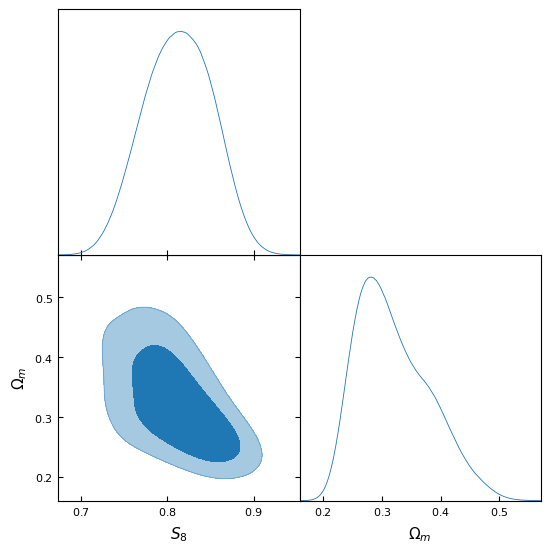

In [24]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples_fisher], params=['s8', 'omegam'],
                filled=True, contour_colors=['C0'])

f = plt.gcf()
f.set_figheight(6)
f.set_figwidth(6)